VVCSEM tests by Danusa Souza

The modeler empymod can handle bipole sources and receivers of arbitrary length and direction
(where a bipole has a significant distance between the electrodes, as compared to a infinitesimally small dipole).
So if you can model a bipole, why would you bother to check if you can model it as a dipole? The answer is speed.
To model a bipole you integrate along the bipole by calculating various dipoles. If both source and receiver are bipoles,
and you interpolate with 5 points each, you need 25 times longer to model the bipole-bipole survey instead of the
simplified dipole-dipole survey.

I have a memory of a rule of thumb that says that if your offset is more than 5 times the bipole length you can model
it as a dipole. I cannot remember where I got that rule from, but we check it with an example.
For this we use the target-model of the previous example.


layer       | depth (m)      | resistivity ($\Omega\,$m) 
------------|----------------|--------------------
air         | $-\infty$ - 0  | 2.0e14                
sea         | 0    - 1000    | 0.33                  
overburden  | 1000 - 2000    | 1.0
HC          | 2000 - 2100    | 100.0
underburden | 2100 - $\infty$| 1.0             


We use x-directed receiver dipoles and

    x-directed source dipole,
    x-directed, 200 m long source bipole.

Bipoles are defined as [x1,x2,y1,y2,z1,z2][x1,x2,y1,y2,z1,z2], where [x1,y1,z1][x1,y1,z1] and [x2,y2,z2][x2,y2,z2]
are the two poles. The parameters srcpts/recpts define how many dipoles are calculated to model the bipole.
If srcpts/recpts is smaller than 3,


In [2]:
# Load plotting library
import matplotlib as mpl
import matplotlib.pyplot as plt
# Load NumPy for array creation
import numpy as np
# Load the bipole-modeling routine from empymod
from empymod import bipole

In [3]:
# Collect the common input parameters

inp2 = {'src': [0, 0, 0, 0, 50, 1000],      # => Note: we have to put src-z and rec-z slightly below 0;
        'rec': [1000, 0, 1000, 0, 270],             # otherwise empymod would put them into the air-layer
        'depth': [0, 1000, 2000, 2030],      # Depth: all layer interfaces, without +/-infinity
        'verb': 0}                               # set verbosity to silent

# Define resistivities
#bkg = [2e14, .33]
bkg = [2e14, .33, 1, 1, 1]
oil = [2e14, .33, 1, 100, 1]


# 2. Time domain (switch-off)
# To calculate time instead of frequency, we have to provide a signal:
# 0: impulse response; 1: switch-on; -1: switch-off
t = np.logspace(-3, 3, 100)                                # Define  times
bkg_time = bipole(srcpts=4,res=bkg, freqtime=t, signal= -1, **inp2)  # Calculate background
oil_time = bipole(srcpts=4,res=oil, freqtime=t, signal= -1, **inp2)  # Calculate target

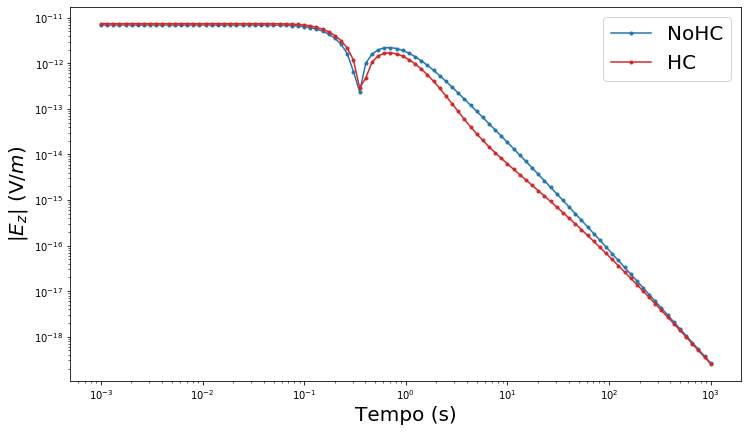

In [4]:
    plt.figure(figsize=(25, 8), num='10. Simple example')
    plt.subplots_adjust(left=0.08, right=.9, top=.8, bottom=.15, wspace=.2)
    #plt.subplots_adjust(left=2, right=2, top=2, bottom=2, wspace=.05)
    #plt.suptitle('VTEM example, offset = 0.5 km', fontsize=20, y=.95)

    # Plot time domain
    axes=plt.subplot(121)
    #plt.title('Tempo switch-off')
    plt.loglog(t, np.abs(bkg_time), '.-C0', label='NoHC')
    plt.loglog(t, np.abs(oil_time), '.-C3', label='HC')
    #ax2.yaxis.tick_right()
    #ax2.yaxis.set_label_position('right')
    #axes.set_ylim([1e-15,1.1e-9])
    plt.xlabel('Time (s)', fontsize=20)
    plt.ylabel(r'$|E_z|$ (V/$m$)', fontsize=20)
    #plt.title(' Figura 2 modelo de Holten, 2009')
    plt.legend(fontsize=20)
    plt.show()

In [78]:
# Collect the common input parameters

inp2 = {'src': [0, 0, 0, 0, 50, 1000],      # => Note: we have to put src-z and rec-z slightly below 0;
        'rec': [1000, 0, 1000, 0, -90],     # otherwise empymod would put them into the air-layer
        'depth': [0, 1000, 2000, 2100],     # Depth: all layer interfaces, without +/-infinity
        'strength':2500,
        'verb': 0}                          # set verbosity to silent

inp3 = {'src': [0, 0, 0, 0, 50, 1000],      # => Note: we have to put src-z and rec-z slightly below 0;
        'rec': [1250, 0, 1250, 0, -90],     # otherwise empymod would put them into the air-layer
        'depth': [0, 1000, 2000, 2100],     # Depth: all layer interfaces, without +/-infinity
        'strength':2500,
        'verb': 0}                          # set verbosity to silent


# Define resistivities
bkg = [2e14, .33, 1, 1, 1]
oil = [2e14, .33, 1, 100, 1]


# 2. Time domain (switch-on)
# To calculate time instead of frequency, we have to provide a signal:
# 0: impulse response; 1: switch-on; -1: switch-off
t = np.logspace(-2, 2, 100)                                # Define  times
bkg_time = bipole(srcpts=4,res=bkg, freqtime=t, signal= -1, **inp2)  # Calculate background
oil_time = bipole(srcpts=4,res=oil, freqtime=t, signal= -1, **inp2)  # Calculate target
bkg_time2 = bipole(srcpts=4,res=bkg, freqtime=t, signal= -1, **inp3)  # Calculate background
oil_time2 = bipole(srcpts=4,res=oil, freqtime=t, signal= -1, **inp3)  # Calculate target

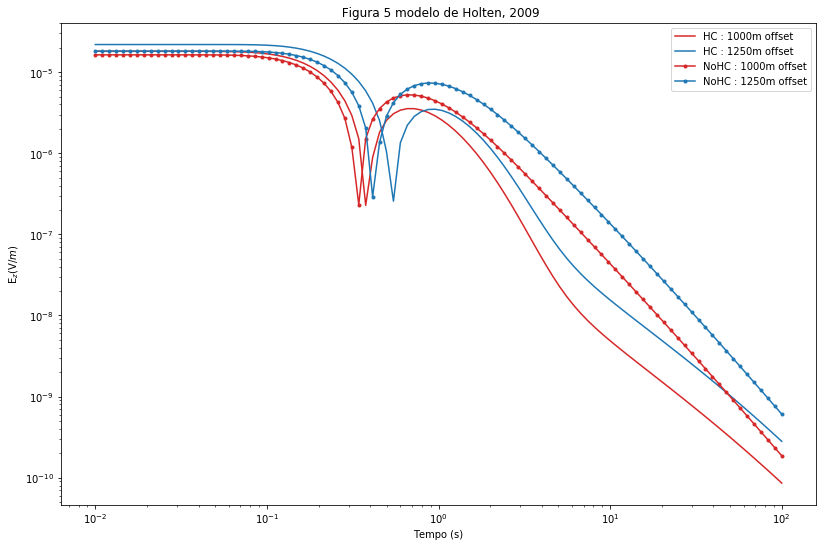

In [79]:
    plt.figure(figsize=(25, 10), num='2. Simple example')
    plt.subplots_adjust(left=0.08, right=.94, top=.82, bottom=.15, wspace=.05)
    #plt.suptitle('VTEM example, offset = 0.5 km', fontsize=20, y=.95)

    # Plot time domain
    axes=plt.subplot(121)
    #plt.title('Tempo switch-off')
    plt.loglog(t, np.abs(oil_time), '-C3', label='HC : 1000m offset')
    plt.loglog(t, np.abs(oil_time2), '-C0', label='HC : 1250m offset')
    plt.loglog(t, np.abs(bkg_time), '.-C3', label='NoHC : 1000m offset')
    plt.loglog(t, np.abs(bkg_time2), '.-C0', label='NoHC : 1250m offset')
    #ax2.yaxis.tick_right()
    #ax2.yaxis.set_label_position('right')
    #axes.set_ylim([1e-8,1.1e-5])
    #axes.set_xlim([1e-1,1.1e1])
    plt.xlabel('Tempo (s)')
    plt.ylabel(r'E$_z$(V/$m$)')
    plt.title(' Figura 5 modelo de Holten, 2009')
    plt.legend()
    plt.show()

In [84]:
# Collect the common input parameters

inp2 = {'src': [0, 0, 0, 0, 50, 1000],      # => Note: we have to put src-z and rec-z slightly below 0;
        'depth': [0, 1000, 2000, 2100],     # Depth: all layer interfaces, without +/-infinity
        'res':[2e14, .33, 1, 1, 1],         # NoHC
        'strength':0,
        'verb':0}                           # set verbosity to silent

inp3 = {'src': [0, 0, 0, 0, 50, 1000],      # => Note: we have to put src-z and rec-z slightly below 0;
        'depth': [0, 1000, 2000, 2100],     # Depth: all layer interfaces, without +/-infinity
        'res':[2e14, .33, 1, 100, 1],       # HC
        'strength':0,
        'verb':0}                           # set verbosity to silent

# Define resistivities
rec_50m = [50, 0, 1000, 0, -90]
rec_100m = [100, 0, 1000, 0, -90]
rec_150m = [150, 0, 1000, 0, -90]
rec_175m = [175, 0, 1000, 0, -90]
rec_250m = [250, 0, 1000, 0, -90]
rec_500m = [500, 0, 1000, 0, -90]
rec_2000m = [2000, 0, 1000, 0, -90]


# 2. Time domain (switch-on)
# To calculate time instead of frequency, we have to provide a signal:
# 0: impulse response; 1: switch-on; -1: switch-off

# No HC
t = np.logspace(-5, 2, 100)                                # Define  times
rec_50time = bipole(srcpts=10,rec=rec_50m, freqtime=t, signal= -1, **inp2)  # Calculate 50 m
rec_100time = bipole(srcpts=10,rec=rec_100m, freqtime=t, signal= -1, **inp2)  # Calculate 100 m
rec_150time = bipole(srcpts=10,rec=rec_150m, freqtime=t, signal= -1, **inp2)  # Calculate 150 m
rec_175time = bipole(srcpts=10,rec=rec_175m, freqtime=t, signal= -1, **inp2)  # Calculate 175 m
rec_250time = bipole(srcpts=10,rec=rec_250m, freqtime=t, signal= -1, **inp2)  # Calculate 250 m
rec_500time = bipole(srcpts=10,rec=rec_500m, freqtime=t, signal= -1, **inp2)  # Calculate 500 m
rec_2000time = bipole(srcpts=10,rec=rec_2000m, freqtime=t, signal= -1, **inp2)  # Calculate 2000 m

# HC
t = np.logspace(-5, 2, 100)                                # Define  times
rec_50hctime = bipole(srcpts=10,rec=rec_50m, freqtime=t, signal= -1, **inp3)  # Calculate 50 m
rec_100hctime = bipole(srcpts=10,rec=rec_100m, freqtime=t, signal= -1, **inp3)  # Calculate 100 m
rec_150hctime = bipole(srcpts=10,rec=rec_150m, freqtime=t, signal= -1, **inp3)  # Calculate 150 m
rec_175hctime = bipole(srcpts=10,rec=rec_175m, freqtime=t, signal= -1, **inp3)  # Calculate 175 m
rec_250hctime = bipole(srcpts=10,rec=rec_250m, freqtime=t, signal= -1, **inp3)  # Calculate 250 m
rec_500hctime = bipole(srcpts=10,rec=rec_500m, freqtime=t, signal= -1, **inp3)  # Calculate 500 m
rec_2000hctime = bipole(srcpts=10,rec=rec_2000m, freqtime=t, signal= -1, **inp3)  # Calculate 2000 m

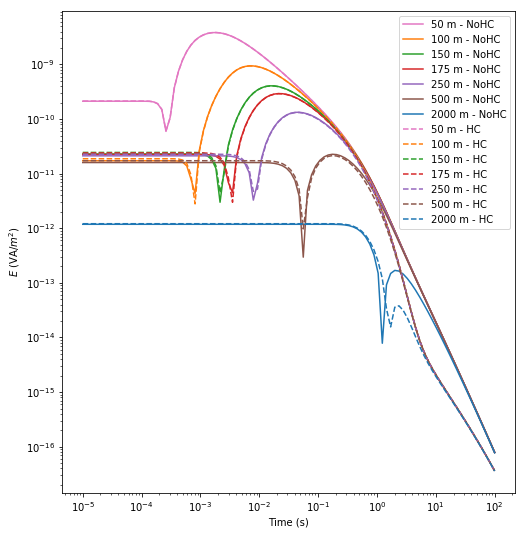

In [85]:
    plt.figure(figsize=(15, 10), num='2. Simple example')
    plt.subplots_adjust(left=0.08, right=.94, top=.82, bottom=.15, wspace=.05)
    # Plot time domain
    axes=plt.subplot(121)
    #plt.title('Tempo switch-off')
    plt.loglog(t, np.abs(rec_50time), 'C6', label='50 m - NoHC')
    plt.loglog(t, np.abs(rec_100time), 'C1', label='100 m - NoHC')
    plt.loglog(t, np.abs(rec_150time), 'C2', label='150 m - NoHC')
    plt.loglog(t, np.abs(rec_175time), 'C3', label='175 m - NoHC')
    plt.loglog(t, np.abs(rec_250time), 'C4', label='250 m - NoHC')
    plt.loglog(t, np.abs(rec_500time), 'C5', label='500 m - NoHC')
    plt.loglog(t, np.abs(rec_2000time), 'C0', label='2000 m - NoHC')

    plt.loglog(t, np.abs(rec_50hctime), 'C6--', label='50 m - HC')
    plt.loglog(t, np.abs(rec_100hctime), 'C1--', label='100 m - HC')
    plt.loglog(t, np.abs(rec_150hctime), 'C2--', label='150 m - HC')
    plt.loglog(t, np.abs(rec_175hctime), 'C3--', label='175 m - HC')
    plt.loglog(t, np.abs(rec_250hctime), 'C4--', label='250 m - HC')
    plt.loglog(t, np.abs(rec_500hctime), 'C5--', label='500 m - HC')
    plt.loglog(t, np.abs(rec_2000hctime), 'C0--', label='2000 m - HC')

    
    #plt.loglog(t, np.abs(np.real(rec_50time)), 'C0', label='50 m')
    #plt.loglog(t, np.abs(np.real(rec_100time)), 'C1', label='100 m')
    #plt.loglog(t, np.abs(np.real(rec_150time)), 'C2', label='150 m')


    plt.xlabel('Time (s)')
    plt.ylabel(r'$E$ (VA/$m^2$)')
    #axes.set_ylim([1e-15,1e-5])
    #axes.set_xlim([1e-5,1e-10])
    plt.legend()
    plt.show()

In [20]:
# Modelo para Holten, 2009
# Collect the common input parameters

inp2 = {'src': [0, 0, 0, 0, 50, 1000],      # => Note: we have to put src-z and rec-z slightly below 0;
        'depth': [0, 1000, 2000, 2100, 2200],     # Depth: all layer interfaces, without +/-infinity
        'res':[2e14, .3, 1, 1, 1, 1],         # NoHC
        'strength':0,
        'verb':0}                           # set verbosity to silent

inp3 = {'src': [0, 0, 0, 0, 50, 1000],      # => Note: we have to put src-z and rec-z slightly below 0;
        'depth': [0, 1000, 2000, 2100, 2200],     # Depth: all layer interfaces, without +/-infinity
        'res':[2e14, .3, 1, 100, 1, 1],       # HC
        'strength':0,
        'verb':0}                           # set verbosity to silent

# Define resistivities
rec_500m = [1000, 0, 1000, 0, -90]

# 2. Time domain (switch-on)
# To calculate time instead of frequency, we have to provide a signal:
# 0: impulse response; 1: switch-on; -1: switch-off

# No HC
t = np.logspace(-1, 2, 100)                                # Define  times
rec_500time = bipole(srcpts=10,rec=rec_500m, freqtime=t, signal= -1, **inp2)  # Calculate 500 m

# HC
t = np.logspace(-1, 2, 100)                                # Define  times
rec_500hctime = bipole(srcpts=10,rec=rec_500m, freqtime=t, signal= -1, **inp3)  # Calculate 500 m

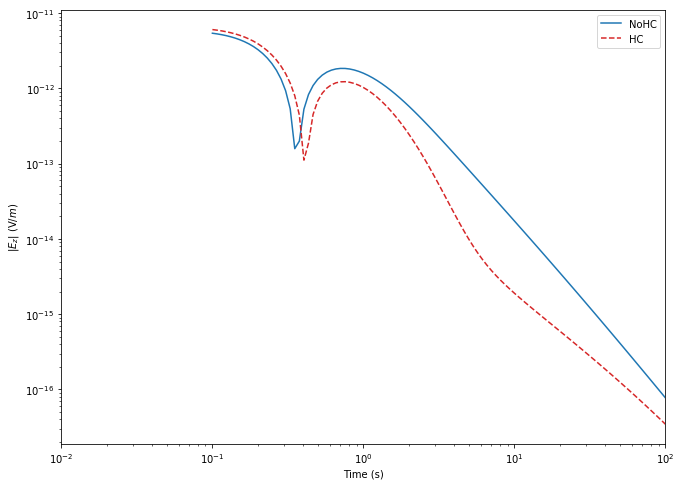

In [12]:
    plt.figure(figsize=(20, 9), num='2. Simple example')
    plt.subplots_adjust(left=0.08, right=.94, top=.82, bottom=.15, wspace=.05)
    # Plot time domain
    axes=plt.subplot(121)
    #plt.title('Tempo switch-off')
    plt.loglog(t, np.abs(rec_500time), 'C0', label='NoHC')

    plt.loglog(t, np.abs(rec_500hctime), 'C3--', label='HC')


    plt.xlabel('Time (s)')
    plt.ylabel(r'$|E_z|$ (V/$m$)')
    #axes.set_ylim([1e-10,1e-4])
    axes.set_xlim([0.01,100])
    #plt.title(' Rx offset 500')
    plt.legend()
    plt.show()

In [13]:
# TDCSEM de Holten, 2009 (5)
# Collect the common input parameters

inp2 = {'src': [0, 0, 0, 0, 50, 1000],      # => Note: we have to put src-z and rec-z slightly below 0;
        'depth': [0, 1000, 2000, 2100],     # Depth: all layer interfaces, without +/-infinity
        'res':[2e14, .33, 1, 1, 1],         # NoHC
        'strength':2500,
        'verb':0}                           # set verbosity to silent

inp3 = {'src': [0, 0, 0, 0, 50, 1000],      # => Note: we have to put src-z and rec-z slightly below 0;
        'depth': [0, 1000, 2000, 2100],     # Depth: all layer interfaces, without +/-infinity
        'res':[2e14, .33, 1, 100, 1],       # HC
        'strength':2500,
        'verb':0}                           # set verbosity to silent

# Define resistivities
rec_250m = [250, 0, 1000, 0, -90]
rec_500m = [500, 0, 1000, 0, -90]
rec_750m = [750, 0, 1000, 0, -90]
rec_1000m = [1000, 0, 1000, 0, -90]
rec_1250m = [1250, 0, 1000, 0, -90]
rec_1500m = [1500, 0, 1000, 0, -90]

# 2. Time domain (switch-on)
# To calculate time instead of frequency, we have to provide a signal:
# 0: impulse response; 1: switch-on; -1: switch-off

# No HC
t = np.logspace(-1, 2, 100)                                # Define  times
rec_250time = bipole(srcpts=10,rec=rec_250m, freqtime=t, signal= -1, **inp2)  # Calculate 250 m
rec_500time = bipole(srcpts=10,rec=rec_500m, freqtime=t, signal= -1, **inp2)  # Calculate 500 m
rec_750time = bipole(srcpts=10,rec=rec_750m, freqtime=t, signal= -1, **inp2)  # Calculate 750 m
rec_1000time = bipole(srcpts=10,rec=rec_1000m, freqtime=t, signal= -1, **inp2)  # Calculate 1000 m
rec_1250time = bipole(srcpts=10,rec=rec_1250m, freqtime=t, signal= -1, **inp2)  # Calculate 1250 m
rec_1500time = bipole(srcpts=10,rec=rec_1500m, freqtime=t, signal= -1, **inp2)  # Calculate 1500 m

# HC
t = np.logspace(-1, 2, 100)                                # Define  times
rec_250hctime = bipole(srcpts=10,rec=rec_250m, freqtime=t, signal= -1, **inp3)  # Calculate 250 m
rec_500hctime = bipole(srcpts=10,rec=rec_500m, freqtime=t, signal= -1, **inp3)  # Calculate 500 m
rec_750hctime = bipole(srcpts=10,rec=rec_750m, freqtime=t, signal= -1, **inp3)  # Calculate 750 m
rec_1000hctime = bipole(srcpts=10,rec=rec_1000m, freqtime=t, signal= -1, **inp3)  # Calculate 1000 m
rec_1250hctime = bipole(srcpts=10,rec=rec_1250m, freqtime=t, signal= -1, **inp3)  # Calculate 1250 m
rec_1500hctime = bipole(srcpts=10,rec=rec_1500m, freqtime=t, signal= -1, **inp3)  # Calculate 1500 m

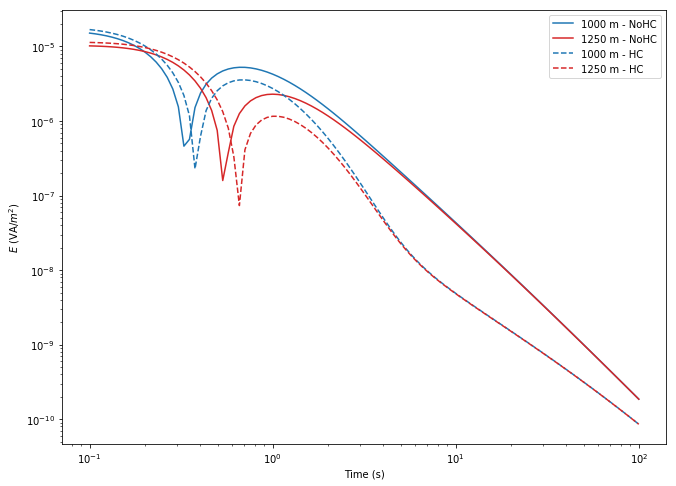

In [14]:
    plt.figure(figsize=(20, 9), num='2. Simple example')
    plt.subplots_adjust(left=0.08, right=.94, top=.82, bottom=.15, wspace=.05)
    # Plot time domain
    axes=plt.subplot(121)
    #plt.title('Tempo switch-off')
    #plt.loglog(t, np.abs(rec_250time), 'C6', label='250 m - NoHC')
    #plt.loglog(t, np.abs(rec_500time), 'C1', label='500 m - NoHC')
    #plt.loglog(t, np.abs(rec_750time), 'C2', label='750 m - NoHC')
    plt.loglog(t, np.abs(rec_1000time), 'C0', label='1000 m - NoHC')
    plt.loglog(t, np.abs(rec_1250time), 'C3', label='1250 m - NoHC')
    #plt.loglog(t, np.abs(rec_1500time), 'C5', label='1500 m - NoHC')
 
    #plt.loglog(t, np.abs(rec_250hctime), 'C6--', label='250 m - HC')
    #plt.loglog(t, np.abs(rec_500hctime), 'C1--', label='500 m - HC')
    #plt.loglog(t, np.abs(rec_750hctime), 'C2--', label='750 m - HC')
    plt.loglog(t, np.abs(rec_1000hctime), 'C0--', label='1000 m - HC')
    plt.loglog(t, np.abs(rec_1250hctime), 'C3--', label='1250 m - HC')
    #plt.loglog(t, np.abs(rec_1500hctime), 'C5--', label='1500 m - HC')

    plt.xlabel('Time (s)')
    plt.ylabel(r'$E$ (VA/$m^2$)')
    #axes.set_ylim([1e-15,1e-5])
    #axes.set_xlim([1e-5,1e-10])
    plt.legend()
    plt.show()

In [ ]:
# Display
create_plot()
save_to_file("simple_plot6")

In [15]:
# Collect the common input parameters

inp2 = {'src': [0, 0, 0, 0, 0, 300],      # => Note: we have to put src-z and rec-z slightly below 0;
        'depth': [0, 300],      # Depth: all layer interfaces, without +/-infinity
        'rec':[1000, 0, 300, 0, 90],
        'strength':0,
        'verb':0}                               # set verbosity to silent

# Define resistivities
resw_2 = [2e14, 0.2, 1.0]
resw_3 = [2e14, 0.3, 1.0]
resw_4 = [2e14, 0.4, 1.0]


# 2. Time domain (switch-on)
# To calculate time instead of frequency, we have to provide a signal:
# 0: impulse response; 1: switch-on; -1: switch-off
t = np.logspace(-1, 2, 100)                                # Define  times
res_2time = bipole(srcpts=10,res=resw_2, freqtime=t, signal= -1, **inp2)  # Calculate 0.5 km
res_3time = bipole(srcpts=10,res=resw_3, freqtime=t, signal= -1, **inp2)  # Calculate 1.0 km
res_4time = bipole(srcpts=10,res=resw_4, freqtime=t, signal= -1, **inp2)  # Calculate 1.5 km

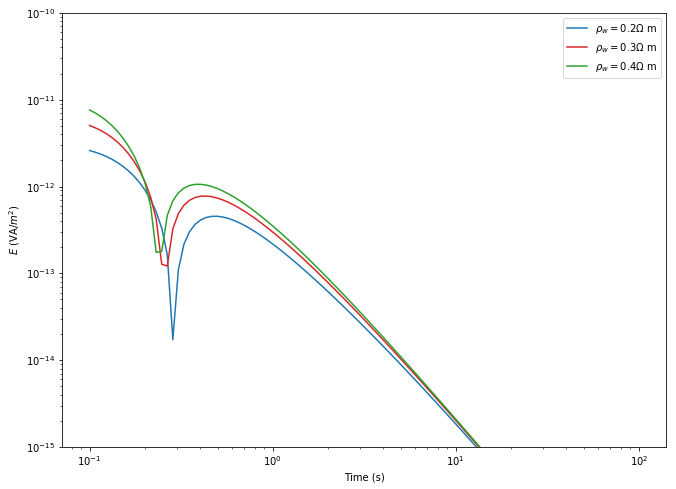

In [17]:
    plt.figure(figsize=(20, 9), num='2. Simple example')
    plt.subplots_adjust(left=0.08, right=.94, top=.82, bottom=.15, wspace=.05)
    # Plot time domain
    axes=plt.subplot(121)
    #plt.title('Tempo switch-off')
    #plt.loglog(t, np.abs(rec0_5time), 'C0', label='0.5 Km')
    #plt.loglog(t, np.abs(rec1_0time), 'C1', label='1.0 Km')
    #plt.loglog(t, np.abs(rec1_5time), 'C2', label='1.5 Km')

    plt.loglog(t, np.abs(np.real(res_2time)), 'C0', label='$\\rho_w = 0.2\Omega$ m')
    plt.loglog(t, np.abs(np.real(res_3time)), 'C3', label='$\\rho_w = 0.3\Omega$ m')
    plt.loglog(t, np.abs(np.real(res_4time)), 'C2', label='$\\rho_w = 0.4\Omega$ m')


    plt.xlabel('Time (s)')
    plt.ylabel(r'$E$ (VA/$m^2$)')
    axes.set_ylim([1e-15,1e-10])
    plt.legend()
    plt.show()